In [1]:
import sys
sys.path.insert(1, '/home/jovyan/home/tools')
sys.path.insert(1, '/home/jovyan/home/tools/abg_python')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from abg_python.snapshot_utils import openSnapshot
from abg_python.cosmo_utils import load_AHF
from itk.itk import inrange, loadpickle, pickle_save_dict
from numba import njit

In [3]:
# good AGN feedback models
CCAbaseDir = '/home/jovyan/fire2/AGN_suite/'
CCA_sims = {
    'push':{
        'h206':CCAbaseDir+'m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1',
        'h29':CCAbaseDir+'m13h29_m3e5/m13h29_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp5e-3_mw4e-7_fa0.5_tw1e4_fmom1'
    },
    'jet':{
        'h206':CCAbaseDir+'m13h206_m3e5/m13h206_m3e5_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1'
    },
    'spawn':{
        'h206':CCAbaseDir+'m13h206_m3e5/m13h206_m3e5_spawn_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1'
    }
}

In [4]:
exec(open('scripts/halo_analysis_scripts.py').read())

# m13, $z \approx 1.8$

## Profile data I/O

In [5]:
all_profiles_m13_z_1_8 = {}

In [3]:
# Quest (m13 no feedback) write
for sim in ['h206', 'h29', 'h113', 'h2']:
    simname = sim + '_HR_sn1dy300ro100ss'
    snapnum = 187
    p0 = load_p0(f'/projects/b1026/anglesd/FIRE/{simname}', snapnum, ahf_path=f'/projects/b1026/halo_files/anglesd_m13/{simname}')
    profiles(p0, outfile=f'data/{simname}_{snapnum}.pkl');

/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.0.hdf5
This is a cosmological snapshot... converting to physical units
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.1.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.2.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.3.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.0.hdf5
This is a cosmological snapshot... converting to physical units
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.1.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.2.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.3.hdf5
Loading redshift 1.799999681531304
h206 167.4216218297942
/projects/b1026/anglesd/FIRE/h29_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.0.hdf5
This is a cosmological snapshot... converting to p

In [6]:
# Quest (m13 no feedback) read
for sim in ['h206', 'h29', 'h113', 'h2']:
    simname = sim + '_HR_sn1dy300ro100ss'
    snapnum = 187
    all_profiles_m13_z_1_8[simname] = loadpickle(f'data/{simname}_{snapnum}.pkl')

In [7]:
# CCA (m13 feedback) write
snapnum = 37
p0 = load_p0(CCA_sims['push']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_1_8['h206_HR_sn1dy300ro100ss']['Rvir'])
profiles(p0, outfile=f'data/h206_push_{snapnum}.pkl');

p0 = load_p0(CCA_sims['push']['h29']+'/output', snapnum, Rvir=all_profiles_m13_z_1_8['h29_HR_sn1dy300ro100ss']['Rvir'])
profiles(p0, outfile=f'data/h29_push_{snapnum}.pkl');

p0 = load_p0(CCA_sims['jet']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_1_8['h206_HR_sn1dy300ro100ss']['Rvir'])
profiles(p0, outfile=f'data/h206_jet_{snapnum}.pkl');

p0 = load_p0(CCA_sims['spawn']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_1_8['h206_HR_sn1dy300ro100ss']['Rvir'])
profiles(p0, outfile=f'data/h206_spawn_{snapnum}.pkl');

/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
Loading redshift 1.7999996640070286


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in float_scalars
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in float_scalars


/home/jovyan/fire2/AGN_suite/m13h29_m3e5/m13h29_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp5e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
/home/jovyan/fire2/AGN_suite/m13h29_m3e5/m13h29_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp5e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
Loading redshift 1.799999664018022
/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
Loading redshift 1.7999996640070286
/home/jovyan/fire2/AGN_suite/m1

In [8]:
# CCA (m13 feedback) read
snapnum = 37
all_profiles_m13_z_1_8['h206_push'] = loadpickle(f'data/h206_push_{snapnum}.pkl')
all_profiles_m13_z_1_8['h29_push'] = loadpickle(f'data/h29_push_{snapnum}.pkl')
all_profiles_m13_z_1_8['h206_jet'] = loadpickle(f'data/h206_jet_{snapnum}.pkl')
all_profiles_m13_z_1_8['h206_spawn'] = loadpickle(f'data/h206_spawn_{snapnum}.pkl')

## Temperature Profile

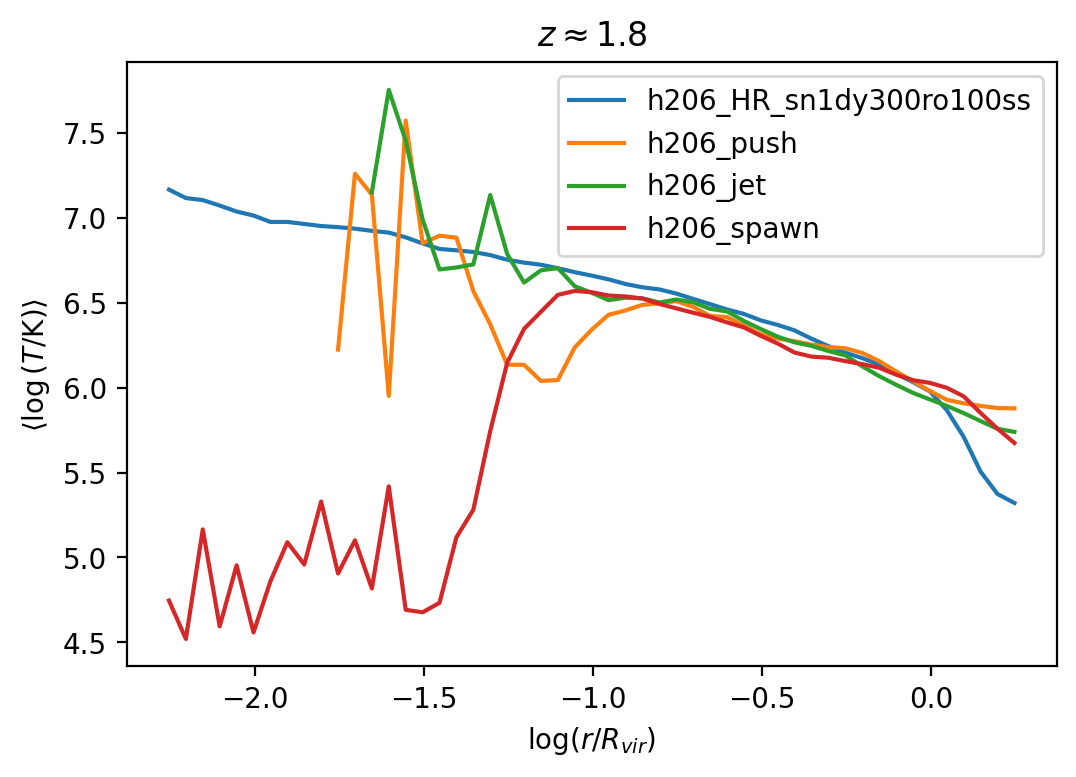

In [42]:
plt.figure(dpi=200)
for sim in all_profiles_m13_z_1_8.keys():
    if 'h206' not in sim:
        continue
    rmid, logTavgbins = all_profiles_m13_z_1_8[sim]['rmid'], all_profiles_m13_z_1_8[sim]['logTavgbins']
    plt.plot(np.log10(rmid), logTavgbins, label=sim)

plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(r'$\left<\log \left(T/\mathrm{K}\right)\right>$')
plt.legend()
plt.title(r'$z \approx 1.8$')
# plt.savefig('Figures/Tprofile_h206_z_1_8.png')

## Density Profile

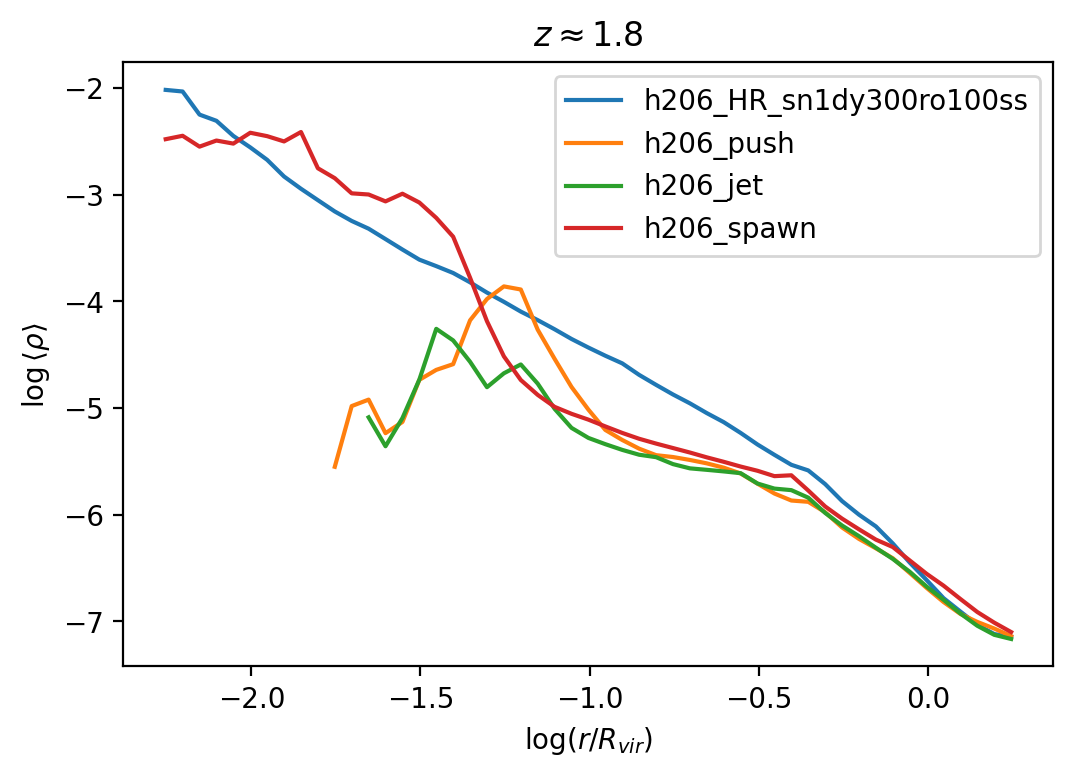

In [43]:
plt.figure(dpi=200)
for sim in all_profiles_m13_z_1_8.keys():
    if 'h206' not in sim:
        continue
    rmid, rhoavgbins = all_profiles_m13_z_1_8[sim]['rmid'], all_profiles_m13_z_1_8[sim]['rhoavgbins']
    plt.plot(np.log10(rmid), np.log10(rhoavgbins), label=sim)

plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(r'$\log \left<\rho \right>$')
plt.legend()
plt.title(r'$z \approx 1.8$')
# plt.savefig('Figures/rhoprofile_h206_z_1_8.png')